In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


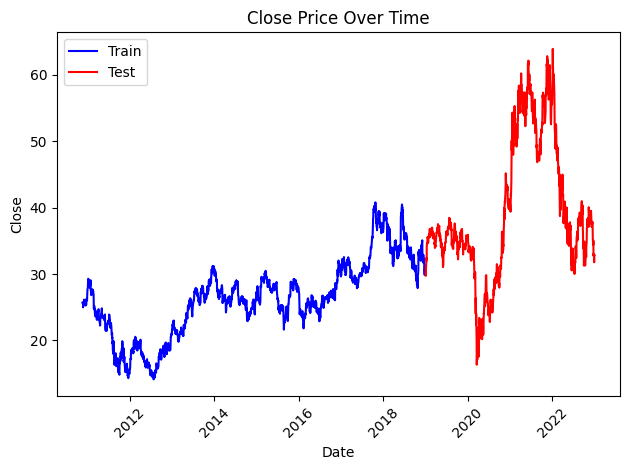

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 7.1721191407710245  Average Fitness = 2.246776910222371
Generation 2: Best fitness = 7.1721191407710245  Average Fitness = 3.005090324036996
Generation 3: Best fitness = 7.1721191407710245  Average Fitness = 3.5784012527653752
Generation 4: Best fitness = 7.366127378359987  Average Fitness = 4.21389876927981
Generation 5: Best fitness = 7.366127378359987  Average Fitness = 4.275428823185933
Island 0 Migration -Left island 9 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right island 3
Island 3 Migration -Left island 2 -Right island 4
Island 4 Migration -Left island 3 -Right island 5
Island 5 Migration -Left island 4 -Right island 6
Island 6 Migration -Left island 5 -Right island 7
Island 7 Migration -Left island 6 -Right island 8
Island 8 Migration -Left island 7 -Right island 9
Island 9 Migration -Left island 8 -Right island 0
Generation 6: Best fitness = 10.09332577517824  Average Fitness 

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

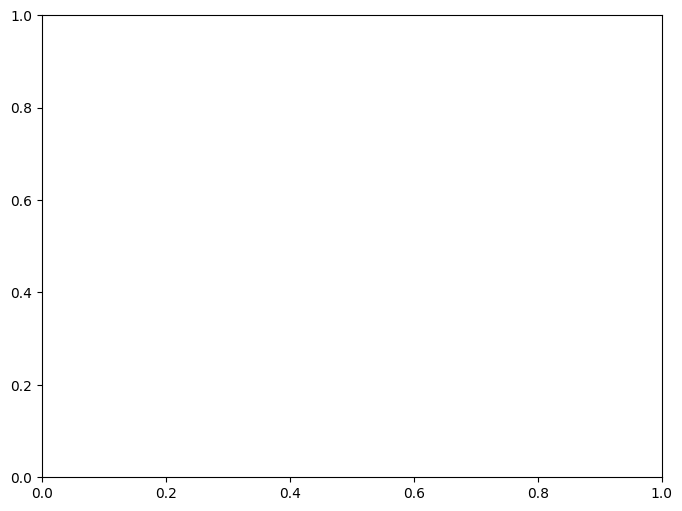

In [4]:
import numpy as np
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]
num_runs = 2# Number of runs to perform

convergence_values = []


for i in evolve_strategy:
    values = []
    if i == 'gga':
        num_islands = 1
        pop_size = 20
    else:
        num_islands = 10
        pop_size = 20
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,K=4, num_islands=num_islands, m_iter=5, num_iter=10, pSize=pop_size, r_cross=0.1, r_mut=0.1,
                       strategies=data.strategies, evolve_strategy=i)
        ga.evolve()
        values.append(ga.convergence_times)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# Plot the convergence values for each evolutionary strategy
file_name = 'convergence_values_times'
np.save(file_name,convergence_values)
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous"
    else:
        l ='Proposed ' + str(evolve_strategy[i]).capitalize()
    plt.plot(np.arange(1, 21), convergence_values[i], label=l)
plt.xlabel('Time (seconds)')
plt.ylabel('Convergence value')
plt.title('Convergence Over Time for Proposed Methods')
plt.legend()
plt.show()


In [4]:
file_name = 'convergence_values'
convergence_values = np.load(file_name + '.npy', allow_pickle=True)
evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]

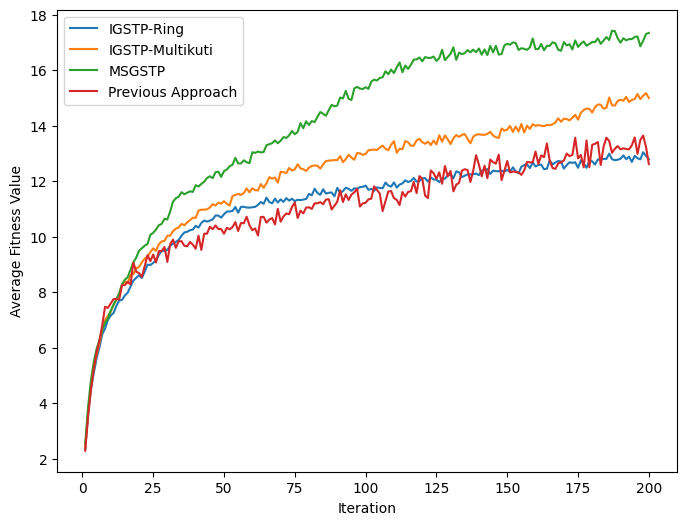

In [5]:
# Plot the convergence values for each evolutionary strategy


plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous Approach"
    elif evolve_strategy[i] == 'ring':
        l = "IGSTP-Ring"
    elif evolve_strategy[i] == "multikuti": 
        l = "IGSTP-Multikuti"
    elif evolve_strategy[i] == "master_slave":
        l = "MSGSTP"
    plt.plot(np.arange(1, 201), convergence_values[i], label=l)
plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
#plt.title('Convergence Over Time for Proposed Methods')
plt.legend()
plt.show()

In [5]:
ga.globalBest.weights
print(ga.globalBest.wb)

0
